# Fancy Indexing

## Exploring Fancy Indexing

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [9]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [10]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays

In [15]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [16]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Also works with multi-dimension arrays, being the first index reffer to the row(s) and the second to the column(s)

In [17]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

In [18]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [20]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combined Indexing

In [21]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [23]:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [22]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [24]:
mask = np.array([1, 0, 1, 0], dtype=bool)
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

In [28]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
x = rand.multivariate_normal(mean, cov, 100)
x.shape


(100, 2)

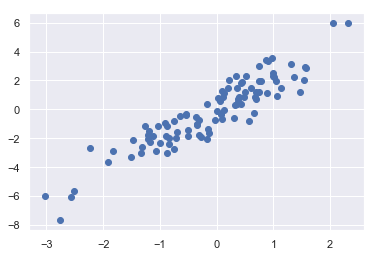

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(x[:, 0], x[:, 1])

Selecting 20 random points with fancy:

In [29]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices

array([11, 94, 87, 47, 73, 85, 10, 25, 69, 53, 76,  2, 43, 75, 64,  8, 41,
       16, 63,  4])

In [30]:
selection = x[indices] # fancy indexing here
selection.shape

(20, 2)

Seem which points were selected:

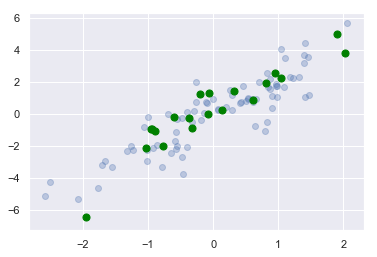

In [46]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='green', s=50);

## Modifying Values with Fancy Indexing

In [47]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [48]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [50]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


the result of this operation is first assign x[0] = 4, x[0] = 6

In [52]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

Unexpectable result, because it's not the augmentation that happens multiple times, but the assignmet

to repeat the operations, use at()

In [55]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


similar method is reduceat()

## Example: Binning Data

Use anterior ideas to efficiently bin data to create a histogram by hand

In [60]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to eache of these bins
np.add.at(counts, i, 1)

Counts reflect the number of points within each bin

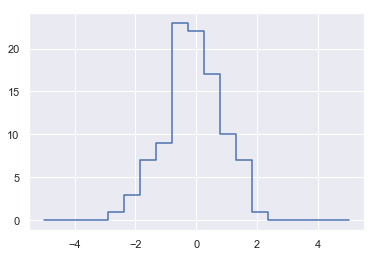

In [61]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

Matpltlib does the same in a single line:

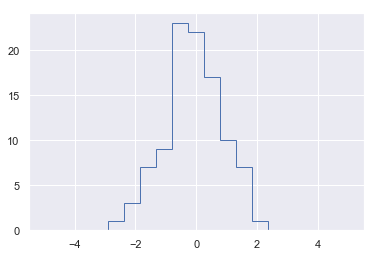

In [62]:
plt.hist(x, bins, histtype='step');

In [63]:
print("NumPy, routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy, routine:
21.8 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
13.4 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


NumPy seems slower, but became better with large datta:

In [65]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
70.7 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
105 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import numpy as np


In [ ]:
%%timeit
x = np.array([7, 5, 2, 1, 8, 1234, 1, 125, 123, 10, 439, 64])
while np.any(x[:-1] > x[1:]):
    np.random.shuffle(x)
x

In [ ]:
%%timeit
x = np.array([7, 5, 2, 1, 8, 1234, 1, 125, 123, 10, 439, 64])
x.sort()